1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
* What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


la varabilità è : [100.]%
Now i plot the dataset on axis following order (0,1) (0,2) (1,2) :


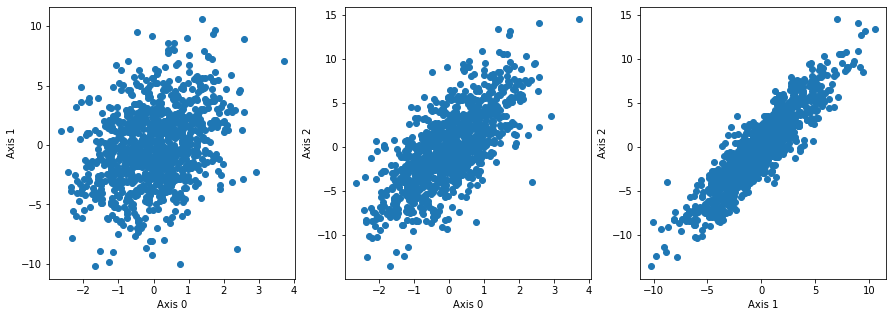

Now i plot the newdataset on new base following order (0,1) (0,2) (1,2) :


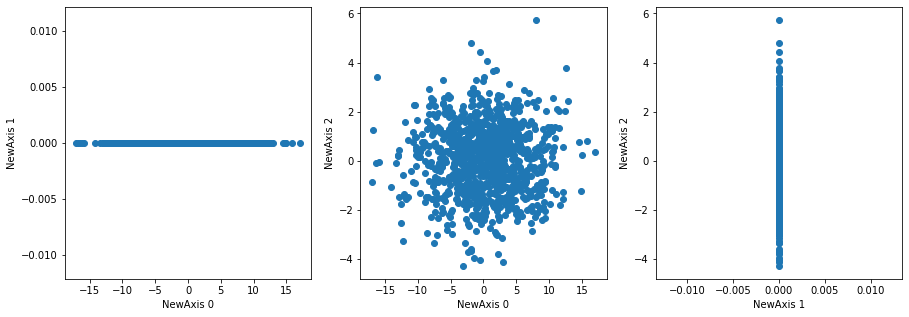

In [3]:
import numpy as np
import math as m
from scipy import linalg as la
from matplotlib import pyplot as plt
import pylab as pl

N=1000
    
normal1=np.array([np.random.normal(0,1) for i in range (N)]).reshape(N,1)
normal2=np.array([normal1[i]+np.random.normal(0,3) for i in range(N)]).reshape(N,1)
normal3=np.array([2*normal1[i]+normal2[i] for i in range(N)]).reshape(N,1)

dataset=np.ones((N,3))


for i in range(N):
    dataset[i,0]=normal1[i]
    dataset[i,1]=normal2[i]
    dataset[i,2]=normal3[i]

dataset=np.array(dataset).T


A=np.cov(dataset)


l, V = la.eig(A)

l=l.reshape(3,1)

U, spectrum, Vt = la.svd(A)

spectrum=spectrum.reshape(3,1)

#eliminando la parte immaginaria degl'autovalori derivanti da l,essi sono uguali a quelli calcolati con spectrum
#tuttavia sia usando np.real(l[i])==spectrum[i] che sommando il coniugato a l[i] e dividendo per 2 il risultato non è
#uguale a spectrum[i].Probabilmente,visto che la parte immaginaria è,al più,dell'ordine di 10 alla -13 
#la discrepanza è dovuta alla precisione della macchina.Infatti:

np.allclose(l,spectrum) #il risultato è True

dopo_k=0
somma_l=0
for k in range(3):
    somma_l=somma_l+spectrum[k]
    if k<=1: #prendendo i primi due ho praticamente il 100% della variabilità
        dopo_k=dopo_k+spectrum[k]

variability=(dopo_k/somma_l)*100

print("la varabilità è :",str(variability)+"%")    


Ap = np.dot(V.T,dataset)

fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 5) )


print("Now i plot the dataset on axis following order (0,1) (0,2) (1,2) :")


x=dataset[0,:]
y1=dataset[1,:]
plt.subplot(1,3,1)
plt.scatter(x,y1)
plt.xlabel('Axis 0')
plt.ylabel('Axis 1')


x=dataset[0,:]
y2=dataset[2,:]
plt.subplot(1,3,2)
plt.scatter(x,y2)
plt.xlabel('Axis 0')
plt.ylabel('Axis 2')


y1=dataset[1,:]
y2=dataset[2,:]
plt.subplot(1,3,3)
plt.scatter(y1,y2)
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')

plt.show()



print("Now i plot the newdataset on new base following order (0,1) (0,2) (1,2) :")

fig= plt.subplots(nrows=1, ncols=3,figsize=(15,5))


X=np.real(Ap[0,:])
Y1=np.real(Ap[1,:])
plt.subplot(1,3,1)
plt.scatter(X,Y1)
plt.xlabel('NewAxis 0')
plt.ylabel('NewAxis 1')


X=np.real(Ap[0,:])
Y2=np.real(Ap[2,:])
plt.subplot(1,3,2)
plt.scatter(X,Y2)
plt.xlabel('NewAxis 0')
plt.ylabel('NewAxis 2')


Y1=np.real(Ap[1,:])
Y2=np.real(Ap[2,:])
plt.subplot(1,3,3)
plt.scatter(Y1,Y2)
plt.xlabel('NewAxis 1')
plt.ylabel('NewAxis 2')

plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

la varabilità è : [100.]%
Now i plot the dataset on axis following order (0,1) (0,2) (1,2) :


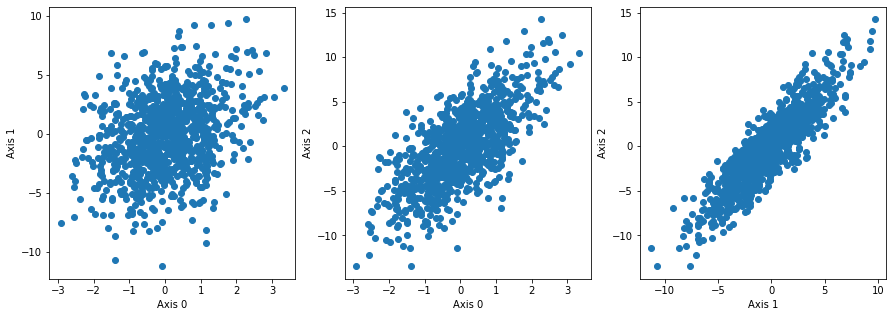

Now i plot the newdataset on new base following order (0,1) (0,2) (1,2) :


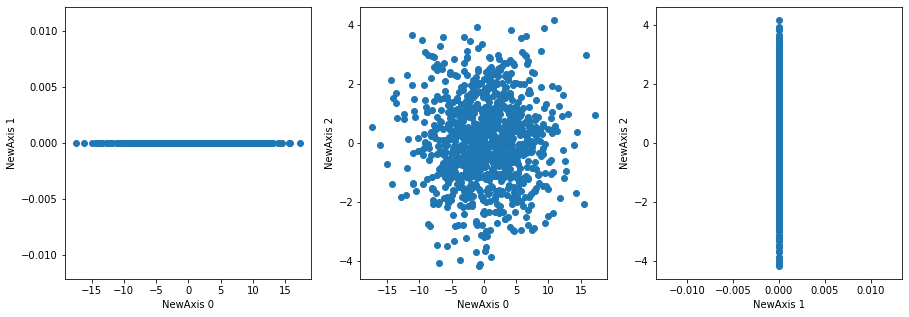

In [2]:
import numpy as np
import math as m
from scipy import linalg as la
from matplotlib import pyplot as plt
import pylab as pl
    
def noise():
    
    error=0
    j=0
    while(j<10):
        error=error+np.random.normal(0,0.02)
        j+=1
        
    return error

   
normal1=np.array([np.random.normal(0,1) +noise() for i in range (1000)]).reshape(1000,1)
normal2=np.array([normal1[i]+np.random.normal(0,3) + noise() for i in range(1000)]).reshape(1000,1)
normal3=np.array([2*normal1[i]+normal2[i] for i in range(1000)]).reshape(1000,1)

dataset=np.ones((1000,3))


for i in range(1000):
    dataset[i,0]=normal1[i]
    dataset[i,1]=normal2[i]
    dataset[i,2]=normal3[i]

dataset=np.array(dataset).T


A=np.cov(dataset)


l, V = la.eig(A)

l=l.reshape(3,1)

U, spectrum, Vt = la.svd(A)

spectrum=spectrum.reshape(3,1)

#eliminando la parte immaginaria degl'autovalori derivanti da l,essi sono uguali a quelli calcolati con spectrum
#tuttavia sia usando np.real(l[i])==spectrum[i] che sommando il coniugato a l[i] e dividendo per 2 il risultato non è
#uguale a spectrum[i].Probabilmente,visto che la parte immaginaria è,al più,dell'ordine di 10 alla -13 
#la discrepanza è dovuta alla precisione della macchina.Infatti:

np.allclose(l,spectrum) #il risultato è True

dopo_k=0
somma_l=0
for k in range(3):
    somma_l=somma_l+spectrum[k]
    if k<=1: #prendendo i primi due ho praticamente il 100% della variabilità
        dopo_k=dopo_k+spectrum[k]

variability=(dopo_k/somma_l)*100

print("la varabilità è :",str(variability)+"%")    


Ap = np.dot(V.T,dataset)

fig = plt.subplots(nrows=1, ncols=3, figsize=(15, 5) )


print("Now i plot the dataset on axis following order (0,1) (0,2) (1,2) :")


x=dataset[0,:]
y1=dataset[1,:]
plt.subplot(1,3,1)
plt.scatter(x,y1)
plt.xlabel('Axis 0')
plt.ylabel('Axis 1')


x=dataset[0,:]
y2=dataset[2,:]
plt.subplot(1,3,2)
plt.scatter(x,y2)
plt.xlabel('Axis 0')
plt.ylabel('Axis 2')


y1=dataset[1,:]
y2=dataset[2,:]
plt.subplot(1,3,3)
plt.scatter(y1,y2)
plt.xlabel('Axis 1')
plt.ylabel('Axis 2')

plt.show()



print("Now i plot the newdataset on new base following order (0,1) (0,2) (1,2) :")

fig= plt.subplots(nrows=1, ncols=3,figsize=(15,5))


X=np.real(Ap[0,:])
Y1=np.real(Ap[1,:])
plt.subplot(1,3,1)
plt.scatter(X,Y1)
plt.xlabel('NewAxis 0')
plt.ylabel('NewAxis 1')


X=np.real(Ap[0,:])
Y2=np.real(Ap[2,:])
plt.subplot(1,3,2)
plt.scatter(X,Y2)
plt.xlabel('NewAxis 0')
plt.ylabel('NewAxis 2')


Y1=np.real(Ap[1,:])
Y2=np.real(Ap[2,:])
plt.subplot(1,3,3)
plt.scatter(Y1,Y2)
plt.xlabel('NewAxis 1')
plt.ylabel('NewAxis 2')

plt.show()

#i obtain the same results


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset